Assignment 3 - Visualization using Python
Data: Dinesafe

In [41]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import scipy 
import PIL
import requests

In [42]:
# Load the dataset
df_dinesafe = pd.read_csv("Dinesafe_cleaned.csv")
df_dinesafe.head(10)
df_dinesafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95289 entries, 0 to 95288
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X_id                       95289 non-null  int64  
 1   Inspection.ID              93547 non-null  float64
 2   Establishment.Type         95289 non-null  object 
 3   Establishment.Status       95289 non-null  object 
 4   Min..Inspections.Per.Year  95289 non-null  object 
 5   Infraction.Details         62499 non-null  object 
 6   Inspection.Date            93547 non-null  object 
 7   Severity                   95289 non-null  object 
 8   Action                     62499 non-null  object 
 9   Outcome                    305 non-null    object 
 10  Amount.Fined               216 non-null    float64
 11  Latitude                   95289 non-null  float64
 12  Longitude                  95289 non-null  float64
 13  Inspection.Year            93547 non-null  flo

In [47]:
# Drop rows with missing values on 'Inspection Year'
df_dinesafe = df_dinesafe[df_dinesafe['Inspection.Year'].notna()].copy()

# Conver the 'Inspection Year' column to a interger
df_dinesafe['Inspection.Year'] = df_dinesafe['Inspection.Year'].astype(str)

In [48]:
df_dinesafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93547 entries, 0 to 95288
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X_id                       93547 non-null  int64  
 1   Inspection.ID              93547 non-null  float64
 2   Establishment.Type         93547 non-null  object 
 3   Establishment.Status       93547 non-null  object 
 4   Min..Inspections.Per.Year  93547 non-null  object 
 5   Infraction.Details         62499 non-null  object 
 6   Inspection.Date            93547 non-null  object 
 7   Severity                   93547 non-null  object 
 8   Action                     62499 non-null  object 
 9   Outcome                    305 non-null    object 
 10  Amount.Fined               216 non-null    float64
 11  Latitude                   93547 non-null  float64
 12  Longitude                  93547 non-null  float64
 13  Inspection.Year            93547 non-null  object 


In [49]:
# Aggregate the data by year and count the number of inspections by severity
total_counts = df_dinesafe.groupby('Inspection.Year').size().reset_index(name='Total Inspections')

severity_counts = df_dinesafe.groupby(['Inspection.Year', 'Severity']).size().reset_index(name='Count')

# Merge for proportions
severity_counts = severity_counts.merge(total_counts, on='Inspection.Year')
# Calculate proportions
severity_counts['Proportion'] = severity_counts['Count'] / severity_counts['Total Inspections']
severity_counts = severity_counts.sort_values(by=['Inspection.Year', 'Severity'])

severity_counts.head(10)

,Inspection.Year,Severity,Count,Total Inspections,Proportion
0,2022,Crucial,448,13894,0.032244
1,2022,Minor,5551,13894,0.399525
2,2022,No Infractions,5093,13894,0.366561
3,2022,Significant,2802,13894,0.201670
4,2023,Crucial,1062,33647,0.031563
5,2023,Minor,14271,33647,0.424139
6,2023,No Infractions,11146,33647,0.331263
7,2023,Significant,7168,33647,0.213035
8,2024,Crucial,1144,34378,0.033277
9,2024,Minor,14050,34378,0.408692


/var/folders/v8/qbldm6wd4gd52rpc6dx417fm0000gn/T/ipykernel_12693/3589028444.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(severity_levels))


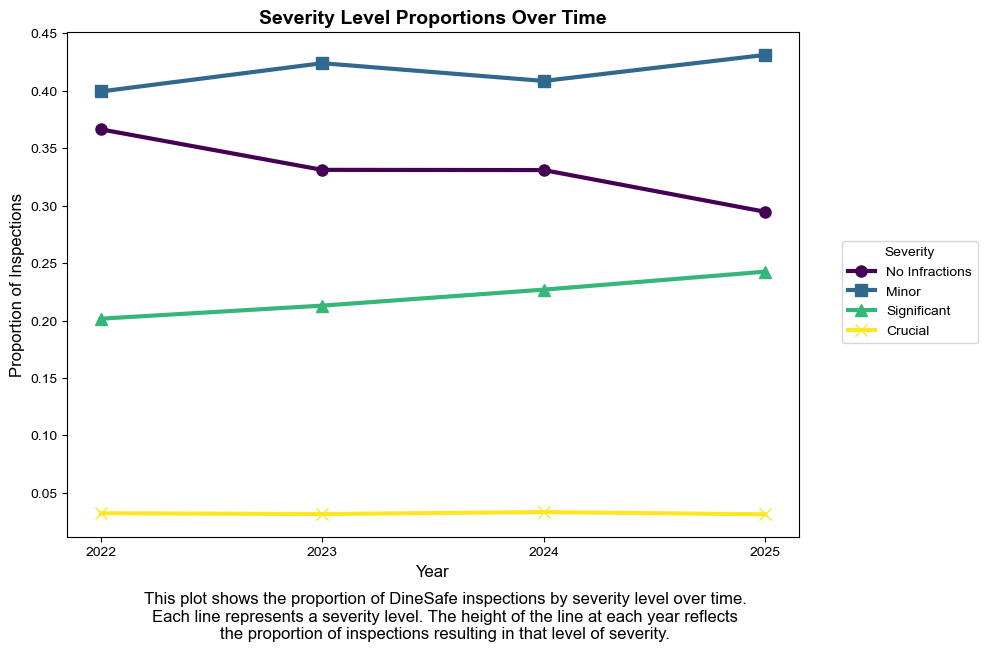

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique severity level markers
#severity_levels = sorted(severity_counts['Severity'].unique())
severity_levels = ['No Infractions', 'Minor', 'Significant', 'Crucial']
markers = ['o', 's', '^', 'x']

# Get viridis color
cmap = cm.get_cmap('viridis', len(severity_levels))
colors = [cmap(i) for i in range(len(severity_levels))]

# Set the font as Arial
plt.rcParams['font.family'] = 'Arial'

# Add a description text
description = (
    "This plot shows the proportion of DineSafe inspections by severity level over time.\n"
    "Each line represents a severity level. The height of the line at each year reflects\n"
    "the proportion of inspections resulting in that level of severity."
)


# Plot each severity level
for i, severity in enumerate(severity_levels):
    severity_data = severity_counts[severity_counts['Severity'] == severity]
    ax.plot(severity_data['Inspection.Year'], 
             severity_data['Proportion'], 
             marker=markers[i], # Marker for each severity level
             color=colors[i], # Color for each severity level
             label=severity,
             linewidth=3,
             markersize=8)
    
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Proportion of Inspections', fontsize=12)
ax.legend(title="Severity", loc = "upper left", bbox_to_anchor=(1.05, 0.6)) # Move legend outside the plot
ax.set_title("Severity Level Proportions Over Time", fontweight='bold', fontsize=14)

fig.text(0.45, -0.07, description, ha='center', fontsize=12, wrap=True) # Add description text
fig.tight_layout()
plt.show()